In [4]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from sklearn.decomposition import PCA
import pickle

In [6]:
session510 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-10')

read from t=0s to t=174.56s
read from t=0s to t=154.21s
read from t=0s to t=183.1s
read from t=0s to t=233.63s


In [8]:
#session = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-10')
with open('/home/diya/Documents/rat-fes/scripts/annie510session.pkl', 'wb') as inp:
    pickle.dump(session510, inp)

In [4]:
#crop for annie-5-6
#crop=[(33, 120), (10, 115), (15, 208), (10, 165)]

In [8]:
#crop for annie-5-10
crop = [(90,155), (0,120), (0, 167), (7, 220)]

In [4]:
#crop for annie-5-12
#crop = [(12,160),(10,155), (9, 210), (12, 230)]


In [9]:
format_rate, format_kin = session510.process(crop, threshold_multiplier=3.0)

(1291, 320)
(2392, 320)
(3332, 320)
(4253, 320)


In [6]:
h, vaf, xtest, ytest = session510.decode_angles()

In [12]:
rates, kins = session510.stitch_data(session510.rate_list, session510.angle_list)

In [10]:
session510.get_gait_indices()

In [14]:
X_gait, Y_gait = session510.divide_into_gaits(rates, kins)

In [16]:
np.array(X_gait).shape, np.array(Y_gait).shape

((933, 12, 32), (933, 12, 7))

In [35]:
session510.neuron_tuning(X_gait)

,13,12,9,23,27,25,30,19,20,0,...,31,6,21,4,11,16,2,1,7,28
0,1.000000,1.000000,0.377560,0.000000,0.463133,0.392489,0.299807,0.875261,0.694778,0.000000,...,0.000000,0.138307,0.247745,0.739395,0.643961,0.448683,0.257895,0.000000,0.000000,0.423682
1,0.369592,0.981028,1.000000,0.851782,0.817400,0.447629,0.546198,0.316419,0.631631,0.047321,...,0.255590,0.000000,0.589489,0.678417,0.750098,0.458439,0.259635,0.103461,0.385993,0.195385
2,0.000000,0.706253,0.875190,1.000000,1.000000,1.000000,0.744127,0.449330,0.480707,0.529191,...,0.191695,0.441771,0.433189,0.781037,0.218964,0.586068,0.408055,0.225222,0.311386,0.832482
3,0.345898,0.922342,0.520314,0.509154,0.702346,0.755512,1.000000,1.000000,1.000000,1.000000,...,0.857691,0.674621,0.737808,0.000000,0.389532,0.440775,0.439243,0.964759,0.708356,0.767782
4,0.962746,0.459997,0.334778,0.546396,0.110463,0.162461,0.906456,0.730944,0.968819,0.825211,...,1.000000,0.969017,0.974258,0.749787,0.666851,0.190452,0.487748,0.775423,0.794329,0.453356
5,0.859750,0.304213,0.130405,0.472278,0.000000,0.000000,0.492645,0.085014,0.429353,0.766243,...,0.569765,1.000000,0.947924,0.907752,0.910432,0.337121,0.595447,0.886458,0.864303,0.445811
6,0.602696,0.344694,0.164989,0.660452,0.129391,0.091229,0.318986,0.000000,0.196960,0.443371,...,0.305263,0.847535,1.000000,1.000000,0.975459,0.726831,0.390737,0.821942,0.841267,0.000000
7,0.678153,0.819645,0.026067,0.606735,0.287425,0.208802,0.036252,0.182258,0.063193,0.553574,...,0.358461,0.450808,0.899593,0.667936,1.000000,1.000000,0.823309,0.967726,0.909395,0.142644
8,0.699191,0.352998,0.037880,0.774290,0.473712,0.286055,0.046572,0.230084,0.000000,0.519656,...,0.670080,0.494317,0.640588,0.700070,0.983338,0.542999,1.000000,1.000000,0.779112,0.270412
9,0.768635,0.379959,0.123721,0.847939,0.649150,0.359337,0.000079,0.268565,0.050846,0.826497,...,0.267556,0.413652,0.634758,0.719777,0.860804,0.330186,0.414767,0.791713,1.000000,1.000000


In [41]:
df = session510.norm_sorted_neurons

In [43]:
df.columns

Int64Index([13, 12,  9, 23, 27, 25, 30, 19, 20,  0, 24,  5, 26,  3, 29, 18, 17,
            22, 15, 14, 10,  8, 31,  6, 21,  4, 11, 16,  2,  1,  7, 28],
           dtype='int64')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
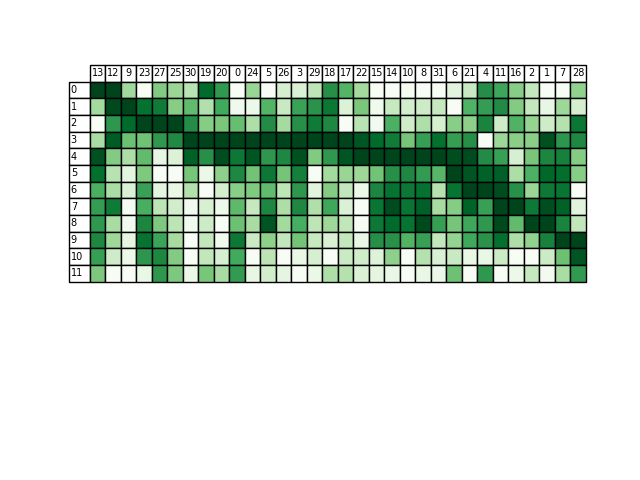

In [44]:
plot_raster(session510.norm_sorted_neurons)

In [9]:
rates_pca_3, pca_output = apply_PCA(rates.T, 3)

In [10]:
rates_pca_3 = rates_pca_3.T
print(rates_pca_3.shape)

(3, 14250)


In [15]:
gait_rates_3, nada = session.divide_into_gaits(rates_pca_3, angles)

In [17]:
gait_rates_3 = np.array(gait_rates_3)

In [19]:
avg_gait_rates_3 = np.average(gait_rates_3, axis=0)

In [57]:
np.vstack((avg_gait_rates_3.T, avg_gait_rates_3[:,0].T)).T.shape

(3, 12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
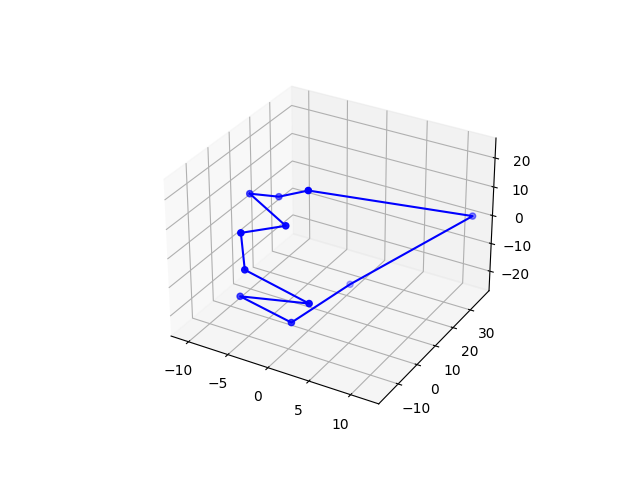

In [58]:
gait_state_space(gait_rates_3)

In [61]:
rates_PCA.shape

(14250, 16)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
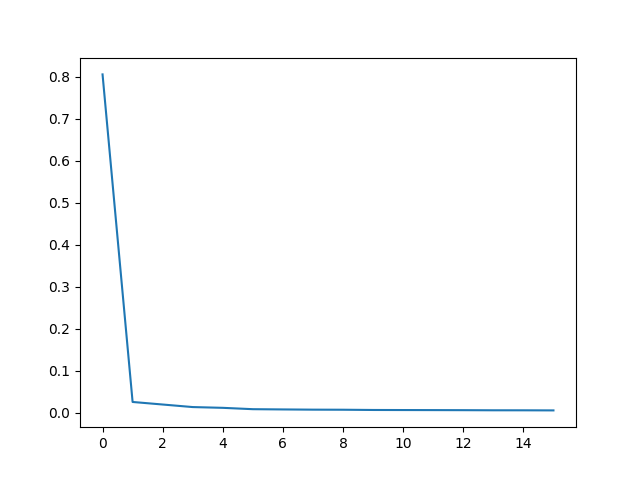

In [62]:
fig, ax = plt.subplots()
ax.plot(pca_output.explained_variance_ratio_)

In [10]:
ret = session.process_toe_height()

In [13]:
h_toe, vaf_toe, x_toe, y_toe = session.decode_toe_height()

[0.22740589 0.23452964 0.39170492 0.37162463 0.45486301 0.39909662
 0.48014544 0.44261503 0.50096096 0.53022475]


0.5302247454447763


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
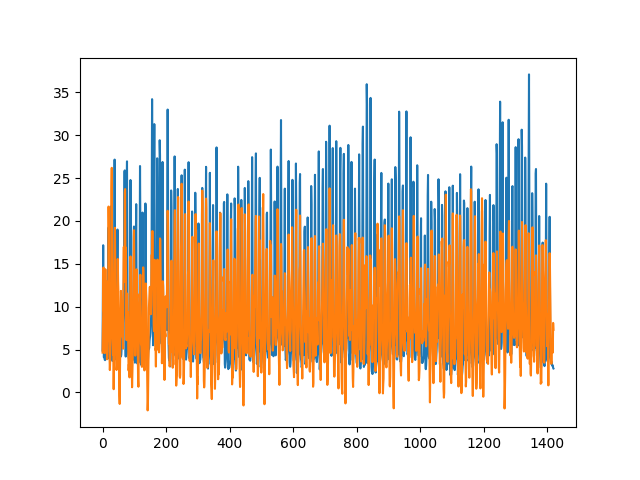

In [14]:
predic_y_toe = test_wiener_filter(x_toe, h_toe)
print(vaf(y_toe, predic_y_toe))
fig1 = plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(y_toe)
ax1.plot(predic_y_toe)

In [6]:
session.divide_into_gaits()

In [11]:
ret = session.neuron_tuning()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
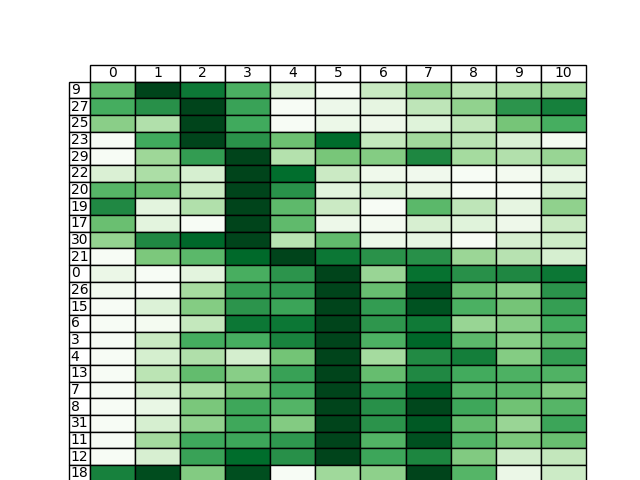

In [24]:
raster(ret)

In [20]:
avg_gait_array.shape

(32, 11)

In [46]:
np.sort(np.argmax(avg_gait_array, axis=1))

array([1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 9])

In [6]:
h, vaffy, test_x, test_y = session.decode_angles()

In [7]:
avg_vaf = np.average(vaffy, axis=1)
predic_y = test_wiener_filter(test_x, h)
print(avg_vaf)

[ 0.20675344  0.46013386 -0.02120971  0.40555553  0.35809882  0.22848822
  0.34918499]


0.484872381408623


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
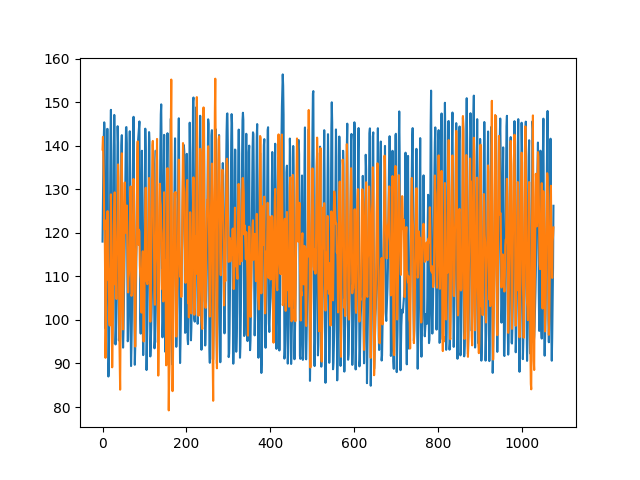

In [8]:
fig0 = plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(test_y[:,3])
ax0.plot(predic_y[:,3])

print(vaf(test_y[:,3], predic_y[:,3]))

In [ ]:
session.divide_into_gaits()

In [31]:
np.array(session.rate_gait).shape

(933, 32, 12)

In [27]:
len(session.angle_gait)

933

In [3]:
crop1 = (5,180)
crop2 = (31,227)
crop3 = (5,200)
crop4 = (5,150)

crop_list = []
crop_list.extend((crop1, crop2, crop3, crop4))

In [4]:
sess1 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-t/session1')

read from t=0s to t=209.21s
read from t=0s to t=242.15s
read from t=0s to t=206.37s
read from t=0s to t=157.26s


In [5]:
rates, kins = sess1.process(crop_list)

In [7]:
a, b, c, d = sess1.linear_decoder(rates,kins)

In [13]:
np.average(b, axis=1)

array([0.11477234, 0.44101014, 0.22976198, 0.4498272 , 0.34468772,
       0.27520053, 0.31955682])

In [14]:
path = '/home/diya/Documents/rat-fes/data/rat-annie/5-6-22/annie2-220506-133311/live_videos'

In [15]:
for file_name in os.listdir(path):
    if file_name.endswith('.npy'):
        print(file_name)
    


TIMESTAMPS_cam1_annie2-220506-133311_200f-11e100g.npy
TIMESTAMPS_cam2_annie2-220506-133311_200f-11e110g.npy


In [17]:
file_name.split('-')

['TIMESTAMPS_cam2_annie2', '220506', '133311_200f', '11e110g.npy']